**Import Pandas and load the Titanic dataset**

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Drop irrelevant columns like Passenger ID and Ticket**

In [ ]:
data.drop(['Ticket', 'PassengerId'], axis = 1, inplace = True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


**Encode the Sex for Male and Female as 0 and 1**

In [ ]:
gender_mapper = {'male' : 0, 'female' : 1}
data['Sex'].replace(gender_mapper, inplace = True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C148,C


**Extract the Title from each name like Mr, Mrs, Miss, Dr, etc.**

In [ ]:
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0])
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S,Mrs.
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,NaN,S,Rev.
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,B42,S,Miss.
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,23.4500,NaN,S,Miss.
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C148,C,Mr.


**If Title is Anything other than Mr, Mrs, Miss, it is an unusual title. Change the name to Title_Unusual**

In [ ]:
data['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in data['Title']]
data = data.rename(columns={'Title': 'Title_Unusual'}) 
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Unusual
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,NaN,S,1
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,B42,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,23.4500,NaN,S,0
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C148,C,0


**Drop Name field as it is just a text field**

In [ ]:
data.drop('Name', axis = 1, inplace = True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Unusual
0,0,3,0,22.0,1,0,7.2500,NaN,S,0
1,1,1,1,38.0,1,0,71.2833,C85,C,0
2,1,3,1,26.0,0,0,7.9250,NaN,S,0
3,1,1,1,35.0,1,0,53.1000,C123,S,0
4,0,3,0,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,NaN,S,1
887,1,1,1,19.0,0,0,30.0000,B42,S,0
888,0,3,1,NaN,1,2,23.4500,NaN,S,0
889,1,1,0,26.0,0,0,30.0000,C148,C,0


**If Cabin is known, it is 1, else 0. Create a column named as Cabin_Known**

In [ ]:
data['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in data['Cabin']] 
data.drop('Cabin', axis=1, inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Unusual,Cabin_Known
0,0,3,0,22.0,1,0,7.2500,S,0,0
1,1,1,1,38.0,1,0,71.2833,C,0,1
2,1,3,1,26.0,0,0,7.9250,S,0,0
3,1,1,1,35.0,1,0,53.1000,S,0,1
4,0,3,0,35.0,0,0,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,1,0
887,1,1,1,19.0,0,0,30.0000,S,0,1
888,0,3,1,NaN,1,2,23.4500,S,0,0
889,1,1,0,26.0,0,0,30.0000,C,0,1


**Create dummy values for Embarked column and make it a new column named Embarked_Q**

In [ ]:
emb_dummies = pd.get_dummies(data['Embarked'], drop_first=True, prefix='Embarked') 
data = pd.concat([data, emb_dummies], axis=1) 
data.drop('Embarked', axis=1, inplace=True) 
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,1,0,1
888,0,3,1,NaN,1,2,23.4500,0,0,0,1
889,1,1,0,26.0,0,0,30.0000,0,1,0,0


**Impute Null values in Age column with the Mean Age**

In [ ]:
data['Age'] = data['Age'].fillna(int(data['Age'].mean()))
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,1,0,1
888,0,3,1,29.0,1,2,23.4500,0,0,0,1
889,1,1,0,26.0,0,0,30.0000,0,1,0,0


**Install and import everything for Classfication in Pycaret**

In [ ]:
import sys
!{sys.executable} -m pip install pycaret 
from pycaret.classification import *

     |████████████████████████████████| 266kB 4.3MB/s 
     |████████████████████████████████| 215kB 13.9MB/s 
     |████████████████████████████████| 6.8MB 15.1MB/s 
     |████████████████████████████████| 245kB 46.3MB/s 
     |████████████████████████████████| 1.7MB 48.9MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 276kB 38.9MB/s 
     |████████████████████████████████| 14.2MB 342kB/s 
     |████████████████████████████████| 102kB 10.0MB/s 
     |████████████████████████████████| 1.8MB 37.2MB/s 
     |████████████████████████████████| 3.1MB 40.2MB/s 
     |████████████████████████████████| 604kB 38.7MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 1.1MB 34.0MB/s 
     |████████████████████████████████| 153kB 37.2MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 163kB 45.3MB/s 
 

**Setup a Classifier with the data, target column as Survived and Seed as 42 for reproducible results**

In [ ]:
classifier = setup(data, target = 'Survived', session_id = 42)

,Description,Value
0,session_id,42
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 11)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


**You can compare the performance of various models along with their metrics**

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8331,0.8571,0.6882,0.8363,0.7525,0.6287,0.6374,0.108
lr,Logistic Regression,0.8282,0.8512,0.7274,0.7922,0.7575,0.6251,0.6271,0.388
ridge,Ridge Classifier,0.8218,0.0000,0.7275,0.7763,0.7505,0.6123,0.6136,0.018
lda,Linear Discriminant Analysis,0.8186,0.8526,0.7275,0.7696,0.7472,0.6061,0.6074,0.019
lightgbm,Light Gradient Boosting Machine,0.8123,0.8534,0.7060,0.7698,0.7347,0.5902,0.5932,0.055
ada,Ada Boost Classifier,0.8105,0.8395,0.7406,0.7471,0.7427,0.5929,0.5940,0.105
rf,Random Forest Classifier,0.8042,0.8450,0.7100,0.7568,0.7282,0.5761,0.5806,0.518
et,Extra Trees Classifier,0.7834,0.8164,0.6926,0.7167,0.7015,0.5321,0.5348,0.466
dt,Decision Tree Classifier,0.7705,0.7496,0.6837,0.7040,0.6875,0.5072,0.5127,0.020
knn,K Neighbors Classifier,0.7094,0.7080,0.5286,0.6249,0.5681,0.3539,0.3589,0.119


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**As Gradient Boosting Classifer is at the top with the best/ideal metrics, we create the 'gbc' model**

**Lets also implement the Light GBM to compare performances**

In [13]:
model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.7799,0.7083,0.7727,0.7391,0.5896,0.5910
1,0.7937,0.8516,0.6087,0.7778,0.6829,0.5333,0.5421
2,0.9048,0.9065,0.8261,0.9048,0.8636,0.7907,0.7926
3,0.9194,0.9208,0.7826,1.0000,0.8780,0.8191,0.8329
4,0.8065,0.8344,0.6087,0.8235,0.7000,0.5618,0.5758
5,0.7742,0.7302,0.5217,0.8000,0.6316,0.4790,0.5017
6,0.8387,0.8763,0.6522,0.8824,0.7500,0.6349,0.6507
7,0.7903,0.8852,0.6957,0.7273,0.7111,0.5467,0.5470
8,0.7903,0.8094,0.6957,0.7273,0.7111,0.5467,0.5470
9,0.9032,0.9766,0.7826,0.9474,0.8571,0.7850,0.7932


In [14]:
model2 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7619,0.8291,0.6250,0.7143,0.6667,0.4828,0.4854
1,0.7778,0.8016,0.6957,0.6957,0.6957,0.5207,0.5207
2,0.8571,0.9011,0.7826,0.8182,0.8000,0.6890,0.6894
3,0.9194,0.9287,0.8261,0.9500,0.8837,0.8225,0.8272
4,0.7903,0.8317,0.6522,0.7500,0.6977,0.5384,0.5415
5,0.7581,0.7386,0.5652,0.7222,0.6341,0.4574,0.4651
6,0.8065,0.8595,0.6522,0.7895,0.7143,0.5699,0.5759
7,0.8065,0.8746,0.6957,0.7619,0.7273,0.5778,0.5792
8,0.7903,0.8071,0.6957,0.7273,0.7111,0.5467,0.5470
9,0.8548,0.9621,0.8696,0.7692,0.8163,0.6971,0.7006


**Plot the graph showing AUROC for model performance**

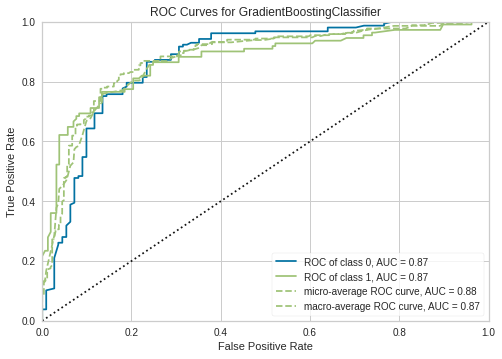

In [ ]:
plot_model(model)

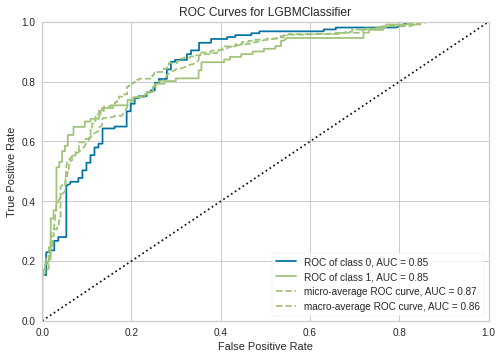

In [15]:
plot_model(model2)

**The AUC seems pretty good for both!**

**The Confusion Matrix shows how well the model classifies the Survival**

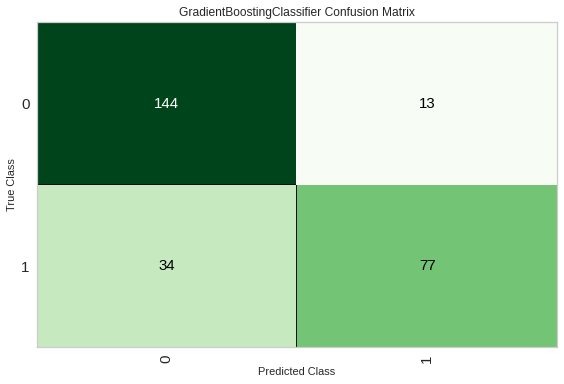

In [ ]:
plot_model(model, 'confusion_matrix')

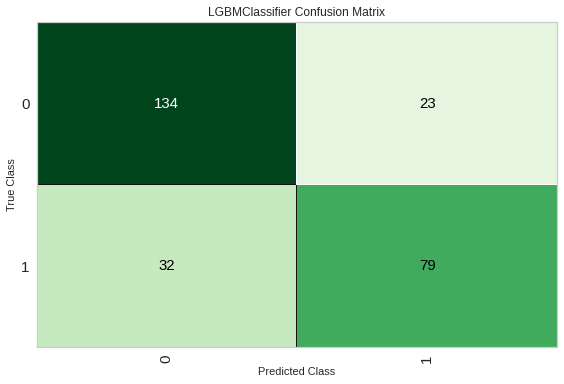

In [17]:
plot_model(model2, 'confusion_matrix')

**Now, predict in on the test set that was initially split on its own during the Setup function**

In [18]:
predictions = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8246,0.8713,0.6937,0.8556,0.7662,0.6283,0.6372


In [19]:
predictions2 = predict_model(model2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7948,0.8548,0.7117,0.7745,0.7418,0.572,0.5734


**Let us check the feature importance behind Light GBM model using PyCaret's SHAP value plot**

In [21]:
!{sys.executable} -m pip install shap

     |████████████████████████████████| 358kB 4.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491627 sha256=bfdbc57a701fd62f628e0e2eeac6cd162c808462d51255e7ab25cee57931fdd7
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


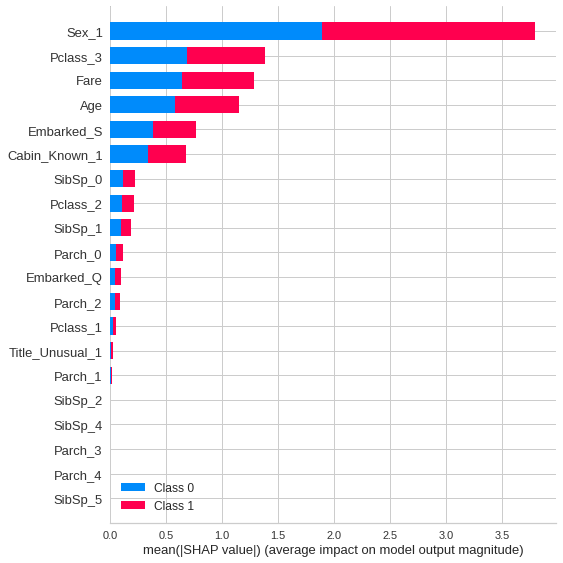

In [22]:
interpret_model(model2)

**Let us also check Correlation and Reason plot using SHAP**

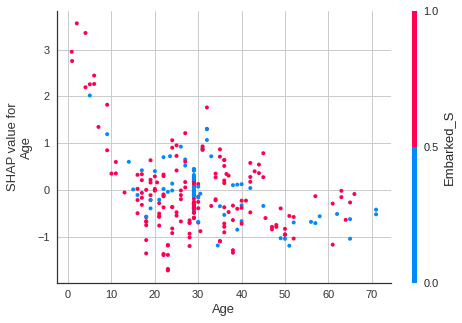

In [23]:
interpret_model(model2, plot = 'correlation')

In [24]:
interpret_model(model2, plot = 'reason', observation = 10)

**For now, the Gradient Boosting Classifier seems like a better choice, we finalize and save it!**

**According the the Prediction performance, you can finalize and save the model**

In [20]:
finalize_model(model)
save_model(model, 'gbc')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Survived',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_i